In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [102]:
plt.style.use('seaborn-whitegrid')

In [154]:
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 20

# Отбор по $\cos{\alpha}$ в эксперименте

In [62]:
year = '19'
files = uproot.pandas.iterate(f'../outputs/{year}/trees/*.root', 'pic_align')

In [63]:
rawCos = pd.concat([i for i in files])

In [64]:
rawCos.head()

,align,mass,passed
0,0.999431,496.262360,True
1,0.991335,504.016510,True
2,0.998894,496.554230,True
3,0.999289,493.943909,True
4,0.998888,494.936981,True


In [65]:
rawCos.passed.mean()

1.0

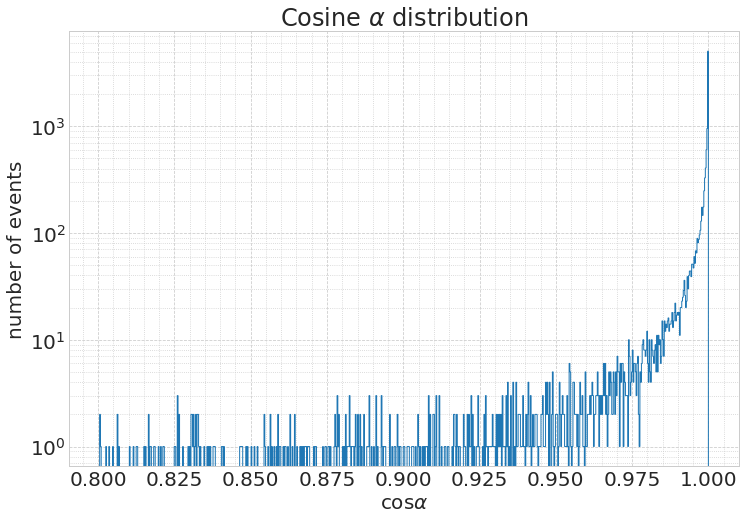

In [204]:
plt.hist(rawCos['align'], bins=800, histtype='step');
plt.yscale('log');
plt.title('Cosine $\\alpha$ distribution');
plt.xlabel('$\\cos{\\alpha}$');
plt.ylabel('number of events');

plt.grid(linestyle = '--');
ax = plt.gca();
ax.minorticks_on();
ax.grid(which='minor', linestyle = ':');

# Отбор по импульсу в эксперименте

In [68]:
year = '19'
files = uproot.open(f'../outputs/{year}/trees/550.00_70260.root')

In [69]:
rawP = files['pic_mom'].pandas.df()

In [70]:
rawP.head()

,momentum,mass,passed
entry,,,
0,211.933121,532.783691,True
1,237.649750,493.273804,True
2,234.128403,494.703888,True
3,236.284241,497.621399,True
4,224.615753,503.018494,True


In [71]:
rawP.passed.mean()

1.0

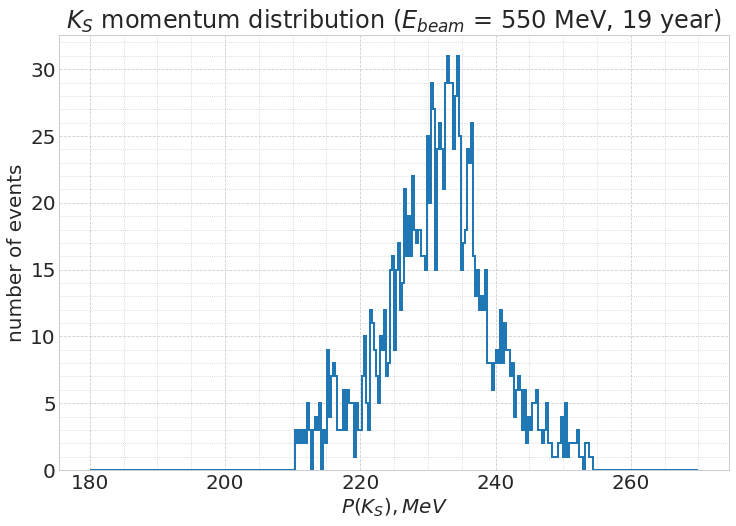

In [203]:
plt.hist(rawP.momentum, bins=300, range=(180, 270), histtype='step', lw=2);
plt.title('$K_S$ momentum distribution ($E_{beam}$ = 550 MeV, 19 year)');
plt.xlabel('$P (K_S), MeV$');
plt.ylabel('number of events');

plt.grid(linestyle = '--');
ax = plt.gca();
ax.minorticks_on();
ax.grid(which='minor', linestyle = ':');

# Эффективность регистрации

In [95]:
rawMCold = pd.read_csv('../outputs/model_old/tables/signal_tablemodel_old.csv')
rawMCnew = pd.read_csv('../outputs/model_new/tables/signal_tablemodel_new.csv')

In [96]:
rawMCold['eff'] = rawMCold.Nsig/rawMCold.lum
rawMCold['effErr'] = rawMCold.dNsig/rawMCold.lum

rawMCnew['eff'] = rawMCnew.Nsig/rawMCnew.lum
rawMCnew['effErr'] = rawMCnew.dNsig/rawMCnew.lum

In [97]:
rawMCold.head()

,name,lum,dEmin,dEmax,Emean,Nsig,dNsig,eff,effErr
0,550.0,7163,0.0,0.0,550.0,1831.24,43.27,0.255653,0.006041
1,562.5,6306,0.0,0.0,562.5,1582.50,40.43,0.250951,0.006411
2,575.0,5516,0.0,0.0,575.0,1387.57,37.83,0.251554,0.006858
3,587.5,5116,0.0,0.0,587.5,1276.30,36.18,0.249472,0.007072
4,600.0,4606,0.0,0.0,600.0,1126.57,34.43,0.244587,0.007475


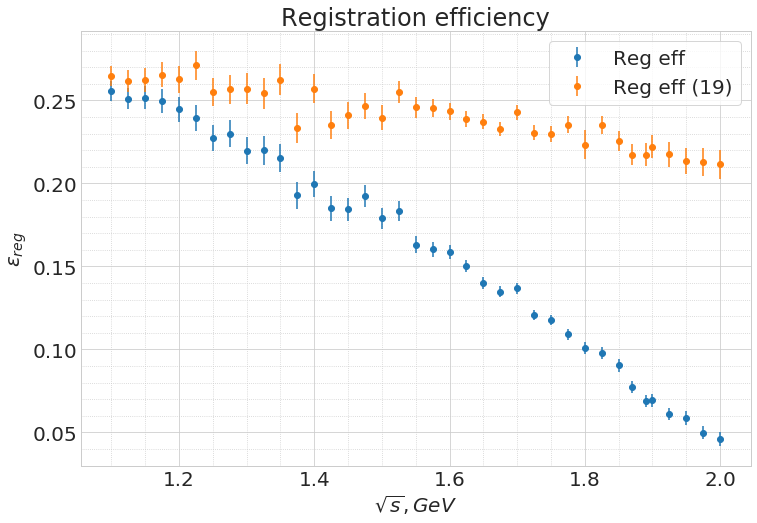

In [201]:
plt.errorbar(x=rawMCold.name*2e-3, y=rawMCold.eff, yerr=rawMCold.effErr, fmt='o', label='Reg eff')
plt.errorbar(x=rawMCnew.name*2e-3, y=rawMCnew.eff, yerr=rawMCnew.effErr, fmt='o', label='Reg eff (19)')
plt.legend(frameon=True);
plt.xlabel('$\sqrt{s}, GeV$');
plt.ylabel('$\\varepsilon_{reg}$');
plt.title('Registration efficiency');

plt.grid(linestyle = '-');
ax = plt.gca();
ax.minorticks_on();
ax.grid(which='minor', linestyle = ':');

# plt.savefig('regeff.pdf')

# Триггеры

In [128]:
rawT = dict()
rawT[11] = pd.read_csv('../outputs/11/tables/triggers11.csv')
rawT[12] = pd.read_csv('../outputs/12/tables/triggers12.csv')
rawT[17] = pd.read_csv('../outputs/17/tables/triggers17.csv')
rawT[19] = pd.read_csv('../outputs/19/tables/triggers19.csv')
for i in rawT:
    rawT[i]['name'] *= 2e-3

In [129]:
rawT[11].head()

,name,TF,CF,TC,eTF,eCF,TrigEff,vTF,vCF,TrigErr
0,1.050,319.0,384.0,154.0,0.29,0.33,0.52,0.02,0.02,0.02
1,1.075,510.0,20.0,393.0,0.95,0.44,0.97,0.01,0.02,0.01
2,1.100,235.0,62.0,103.0,0.62,0.31,0.74,0.04,0.02,0.03
3,1.125,237.0,9.0,170.0,0.94,0.42,0.97,0.02,0.02,0.01
4,1.150,97.0,27.0,45.0,0.62,0.32,0.74,0.06,0.04,0.04


In [175]:
def trigger_plot(data, year, save=False):
    plt.errorbar(data=data, x='name', y='eTF', yerr='vTF', fmt='v', lw=2, ms=0, alpha=0.8, label='TF');
    plt.errorbar(data=data, x='name', y='eCF', yerr='vCF', fmt='v', lw=2, ms=0, alpha=0.8, label='CF');
    plt.errorbar(data=data, x='name', y='TrigEff', yerr='TrigErr', fmt='v', lw=2, ms=8, alpha=0.8, label='both');
    plt.legend(frameon=True);
    plt.xlabel('$\sqrt{s}, GeV$');
    plt.ylabel('$\\varepsilon_{trig}$');
    plt.title(f'Trigger efficiency, {year}');
    plt.grid(True, linestyle = '--');
    ax = plt.gca();
    ax.minorticks_on();
    ax.grid(which='minor', linestyle = ':');
    if save:
        plt.savefig(f'trigEff_{year}.pdf');
    return

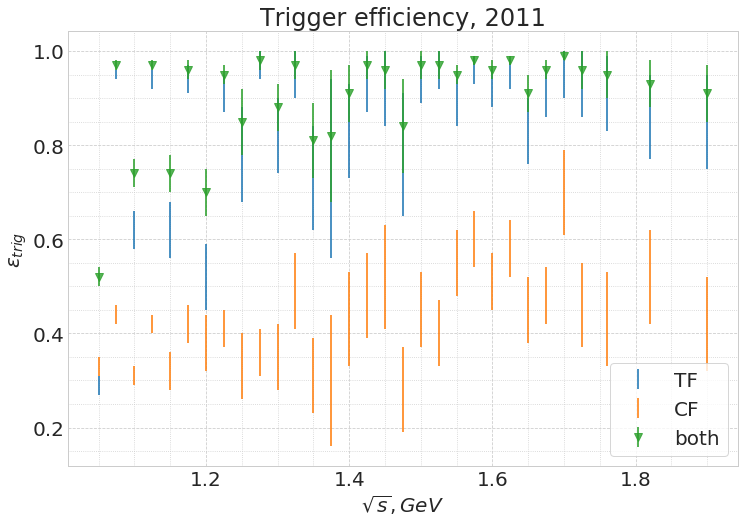

In [180]:
trigger_plot(rawT[11], '2011', save=True)

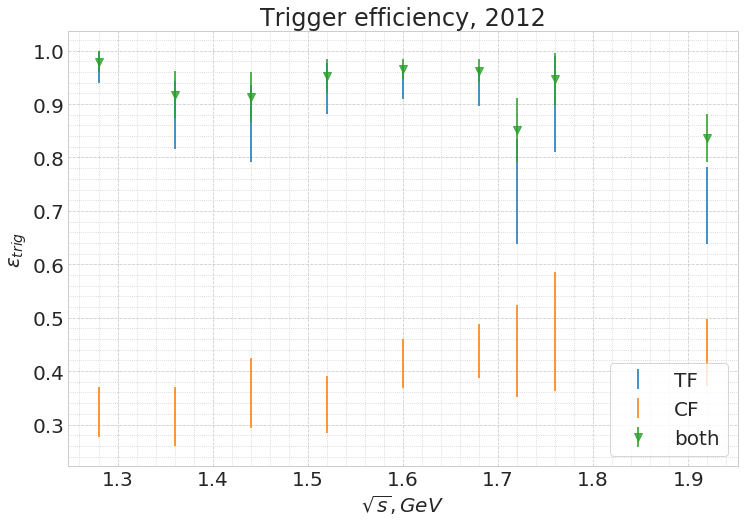

In [181]:
trigger_plot(rawT[12], '2012', save=True)

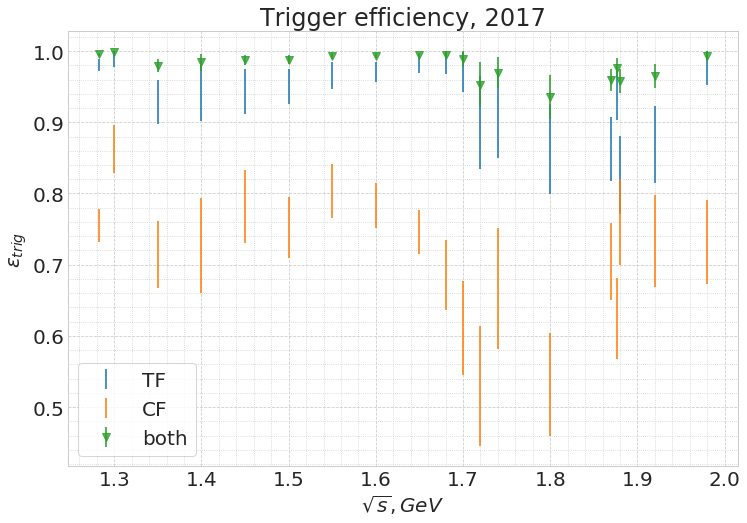

In [182]:
trigger_plot(rawT[17], '2017', save=True)

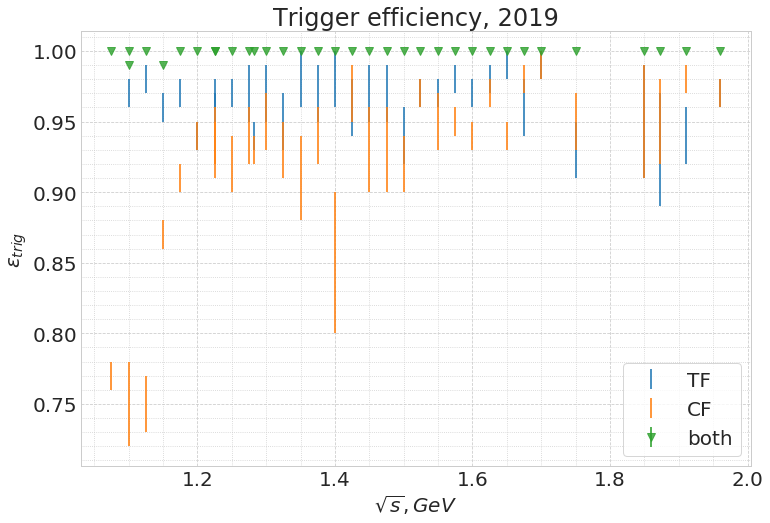

In [183]:
trigger_plot(rawT[19], '2019', save=True)

# Рад.поправки

In [188]:
rawRad = pd.read_csv('../outputs/radcors.dat', names=['energy', 'radcor'])

In [189]:
rawRad.head()

,energy,radcor
0,1.050,0.856548
1,1.060,0.852604
2,1.080,0.856702
3,1.100,0.862562
4,1.125,0.870683


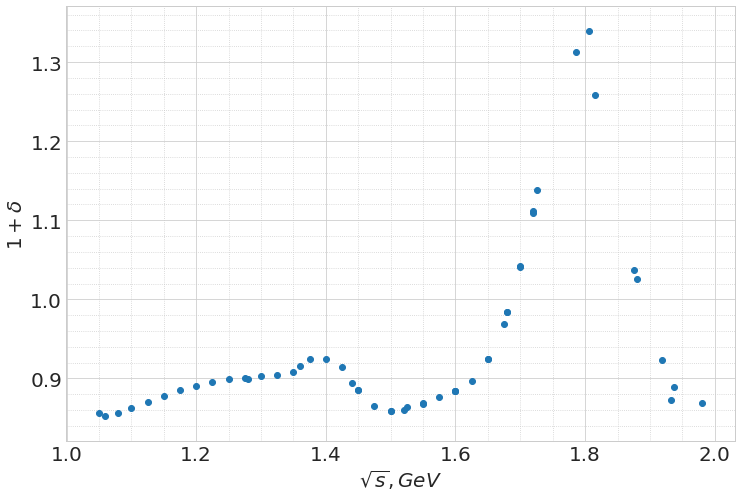

In [199]:
plt.scatter(data=rawRad, x='energy', y='radcor')
plt.xlabel('$\\sqrt{s}, GeV$');
plt.ylabel('$1+\\delta$');
plt.grid(linestyle = '-');
ax = plt.gca();
ax.minorticks_on();
ax.grid(which='minor', linestyle = ':');
# plt.savefig('radcor.pdf')

# Сечения

In [162]:
rawCS = dict()
rawCS[11] = pd.read_csv('../outputs/11/tables/result_visible.csv')

In [164]:
rawCS[11].head()

,name,dEmin,dEmax,Emean,CSvis,dCSvis,TrigEff,TrigErr,RegEff,RegErr,CS,dCS
0,525.0,0.0,0.0,523.58,1.76267,0.06258,0.52,0.02,0.25565,0.00604,13.25918,0.76145
1,537.5,0.0,0.0,537.41,1.63692,0.05487,0.97,0.01,0.25565,0.00604,6.60093,0.27913
2,550.0,0.0,0.0,548.44,0.79807,0.04083,0.74,0.03,0.25565,0.00604,4.21854,0.29286
3,562.5,0.0,0.0,562.13,0.72507,0.03779,0.97,0.01,0.25109,0.00640,2.97700,0.17543
4,575.0,0.0,0.0,575.31,0.32845,0.02672,0.74,0.04,0.25150,0.00686,1.76481,0.17896


# Data preparation

In [3]:
year = '19'

In [4]:
files = uproot.pandas.iterate('../outputs/'+year+'/*.root', 't')#, branches=['label', 'be', 'm', 't', 'proc'])
raw = pd.concat([i for i in files])